# Airline Customer Satisfaction Prediction

_Project outline:_

This project describes the development of a machine learning solution that would allow to predict the satisfaction of customers of an airline compnay based on individual satisfaction scores, features of customers, such as age, gender, and conditions of flights, such as distance traveled and arrival/departure delay.

The models were trained and tested on a dataset from [Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction).

This notebook describes: 
1) Data cleaning and transformation steps <br>
2) Data exploration using summary statistics and basic graphs <br>
3) Correlation analysis and feature selection <br>
4) Model development and evaluation <br>

Packages used: pandas, numpy, seaborn, matplotlib, scikit-learn, statsmodels

## Executive summary

Three machine learning models were developed using Naive Bayes (NB), Decision Trees (DT), and Logistic Regression (LR) algorithms. 

With model tuning, the highest testing accuracy levels achieved with each algorithm were the following:

* Naive Bayes - 86.7%
* Decision Tree - 95%
* Logistic Regression - 87.3%

**Decision Tree** algorithm yeilded the highest accuracy and given its easy interpretability is deemed to be the best solution for this problem.

## Data cleaning

In [2]:
# all the necessary imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# importing the data
data = pd.read_excel("data.xlsx")
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# checking the data types
data.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [5]:
#removing the id column as it does not have any meaning


data.drop(["id"], inplace = True, axis=1) 
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
# checking if there are any missing values

data.isnull().values.any()

True

In [7]:
# there are some missing values
# let's see how many out of 129880

data.isnull().sum().sum()

393

In [8]:
# there are only 393 missing values in the dataset, since it's a small %
# I will perform listwise deletion on the dataset for it to be usable

data = data.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)

In [9]:
# checking again if there are any missings

data.isnull().sum().sum()



0

In [10]:
# no missings, can proceed

## descriptive statistics of the data
summary = data.describe()
summary


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


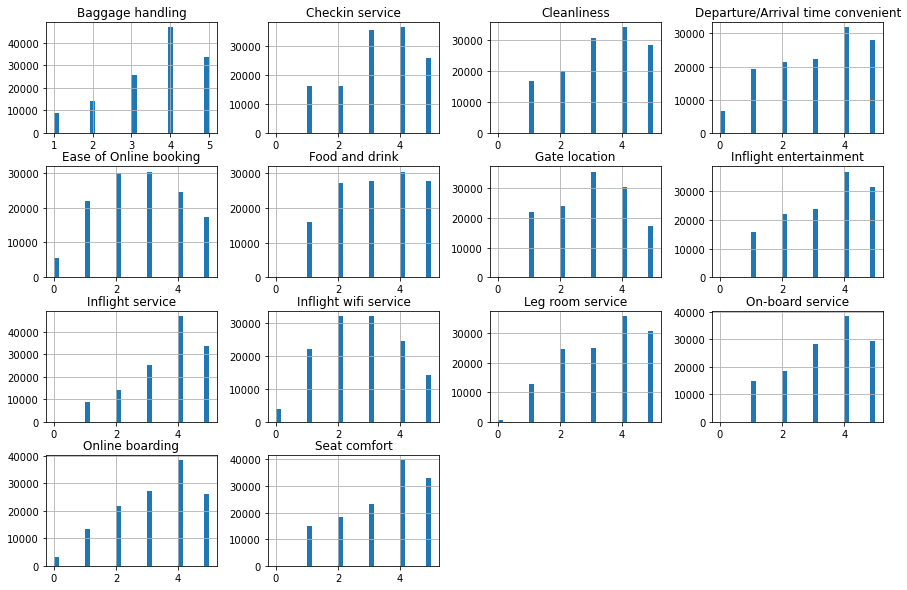

In [11]:
## EDA - graphs


## exploring the individual satisfaction scores

data_sat = data[["Inflight wifi service", 
                 "Departure/Arrival time convenient", "Ease of Online booking",
                 "Gate location", "Food and drink", "Online boarding", 
                 "Seat comfort","Inflight entertainment", "On-board service",
                 "Leg room service", "Baggage handling", "Checkin service",
                 "Inflight service", "Cleanliness"]]

data_sat.hist(bins=30, figsize=(15, 10));


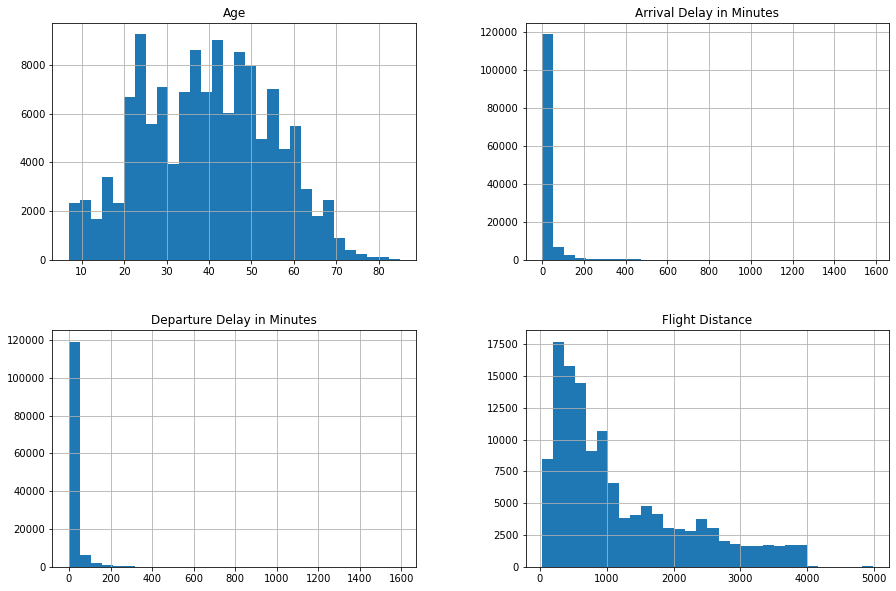

In [12]:
## Exploring all other variables

# numeric
data_rest = data[["Age", "Flight Distance", "Departure Delay in Minutes",
                 "Arrival Delay in Minutes"]]

data_rest.hist(bins=30, figsize=(15, 10));

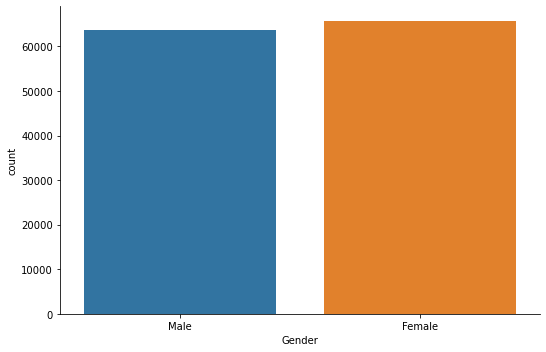

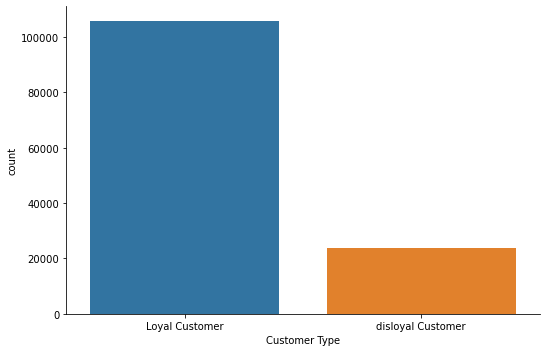

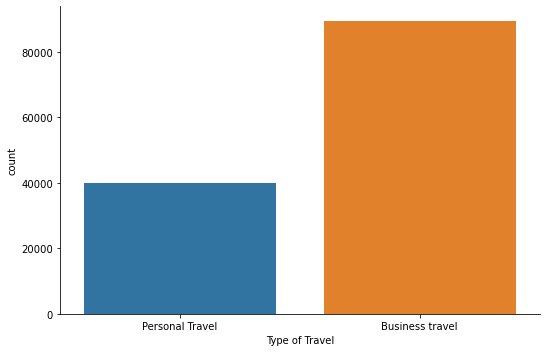

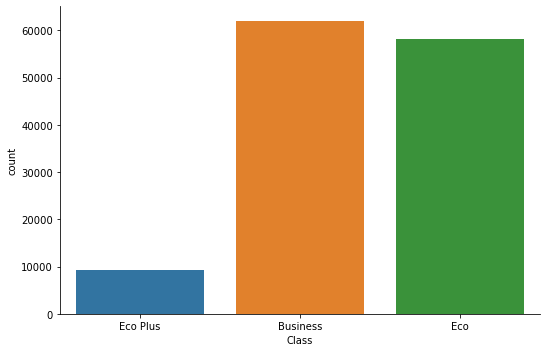

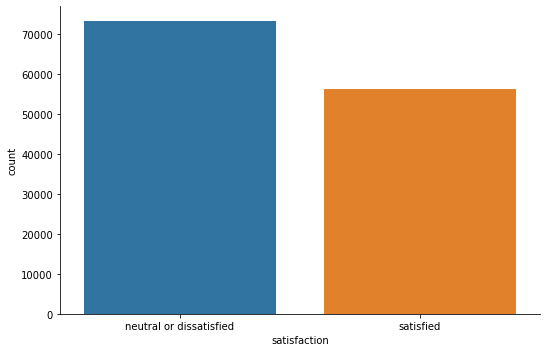

In [13]:
# categorical

data_cat = data[["Gender", "Customer Type", "Type of Travel",
                  "Class", "satisfaction"]]

sns.catplot(kind='count', data=data_cat, x='Gender', height=5, aspect=1.5)
plt.show()

sns.catplot(kind='count', data=data_cat, x='Customer Type', height=5, aspect=1.5)
plt.show()

sns.catplot(kind='count', data=data_cat, x='Type of Travel', height=5, aspect=1.5)
plt.show()

sns.catplot(kind='count', data=data_cat, x='Class', height=5, aspect=1.5)
plt.show()

sns.catplot(kind='count', data=data_cat, x='satisfaction', height=5, aspect=1.5)
plt.show()

In [14]:
## recoding target variable satisfaction to have levels 0 or 1

data['satisfaction'] = np.where(data['satisfaction'] == "satisfied", 1, 0)
# satisfied customers = 1, unsatisfied = 0

In [15]:
# recoding the categorical variables to dummy-numeric

data['Gender'] = np.where(data['Gender'] == "Male", 1, 0)
data["Customer Type"] = np.where(data["Customer Type"] == "Loyal Customer", 1, 0)
data["Type of Travel"] = np.where(data["Type of Travel"] == "Business travel", 1, 0)

def class_recode(Class):
    if Class == "Eco":
        return 0
    elif Class == "Eco Plus":
        return 1
    else:
        return 2
data["Class"] = data["Class"].apply(class_recode)

In [16]:
# checking if everything is recorded fine
data.head(8)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,0,1,26,0,0,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,1,1,47,0,0,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0
7,0,1,52,1,2,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,1


In [17]:
# Creating a correlation matrix to check for correlated variables

corr = data.corr()

corr.style.background_gradient(cmap='coolwarm')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,0.030803,0.008984,-0.009215,0.005732,0.003836,0.005968,0.008772,0.006129,-0.000860,0.001631,-0.044850,-0.030847,0.003798,0.006441,0.031031,0.036414,0.008392,0.038176,0.002818,0.003111,0.001309,0.011496
Customer Type,0.030803,1.000000,0.284275,-0.308210,0.105603,0.226134,0.005884,0.206916,0.018183,-0.004647,0.057126,0.189329,0.156383,0.106157,0.054040,0.046885,-0.025015,0.031258,-0.023567,0.081433,-0.004131,-0.004730,0.185925
Age,0.008984,0.284275,1.000000,0.044910,0.140691,0.099863,0.015779,0.036780,0.022294,-0.000709,0.023283,0.207485,0.159229,0.074990,0.056743,0.038992,-0.048192,0.033182,-0.051778,0.052575,-0.009263,-0.011248,0.134001
Type of Travel,-0.009215,-0.308210,0.044910,1.000000,0.545369,0.267064,0.105574,-0.257208,0.133891,0.029882,0.068728,0.223781,0.127404,0.152708,0.059700,0.139540,0.032921,-0.016530,0.023417,0.084257,0.006336,0.005830,0.449794
Class,0.005732,0.105603,0.140691,0.545369,1.000000,0.451005,0.036800,-0.090074,0.107489,0.005769,0.088244,0.322983,0.227308,0.196274,0.210950,0.206172,0.161377,0.151175,0.155507,0.138551,-0.009973,-0.014104,0.493066
Flight Distance,0.003836,0.226134,0.099863,0.267064,0.451005,1.000000,0.006554,-0.018901,0.064959,0.005378,0.057136,0.215082,0.157825,0.130518,0.111224,0.134548,0.064810,0.073635,0.059182,0.095658,0.001992,-0.001935,0.298206
Inflight wifi service,0.005968,0.005884,0.015779,0.105574,0.036800,0.006554,1.000000,0.344846,0.714888,0.338547,0.132109,0.457422,0.121373,0.207887,0.120028,0.160414,0.120548,0.043847,0.110300,0.131163,-0.016046,-0.017749,0.283291
Departure/Arrival time convenient,0.008772,0.206916,0.036780,-0.257208,-0.090074,-0.018901,0.344846,1.000000,0.437697,0.447411,0.001057,0.072175,0.008707,-0.008189,0.067046,0.010634,0.070646,0.091217,0.072166,0.010021,0.000610,-0.000942,-0.054457
Ease of Online booking,0.006129,0.018183,0.022294,0.133891,0.107489,0.064959,0.714888,0.437697,1.000000,0.460155,0.030638,0.404944,0.028602,0.046669,0.039039,0.109341,0.039215,0.008835,0.035356,0.015150,-0.005330,-0.007033,0.168704
Gate location,-0.000860,-0.004647,-0.000709,0.029882,0.005769,0.005378,0.338547,0.447411,0.460155,1.000000,-0.002825,0.002579,0.002493,0.002751,-0.029109,-0.005146,0.001097,-0.039294,0.000337,-0.006066,0.005943,0.005658,-0.002923


In [18]:
## standardisation
from sklearn.preprocessing import StandardScaler

data[["Age", "Flight Distance", "Inflight wifi service", 
                 "Departure/Arrival time convenient", "Ease of Online booking",
                "Gate location", "Food and drink", "Online boarding", 
                 "Seat comfort","Inflight entertainment", "On-board service",
                 "Leg room service", "Baggage handling", "Checkin service",
                 "Inflight service", "Cleanliness", "Departure Delay in Minutes",
                 "Arrival Delay in Minutes"]] = StandardScaler().fit_transform(data[["Age", "Flight Distance", "Inflight wifi service", 
                 "Departure/Arrival time convenient", "Ease of Online booking",
                 "Gate location", "Food and drink", "Online boarding", 
                 "Seat comfort","Inflight entertainment", "On-board service",
                 "Leg room service", "Baggage handling", "Checkin service",
                 "Inflight service", "Cleanliness", "Departure Delay in Minutes",
                 "Arrival Delay in Minutes"]])

In [19]:
# splitting the data into dependent and independent variables

data_indep = data[["Gender", "Customer Type", "Age", "Type of Travel",
                  "Class","Flight Distance", "Inflight wifi service", 
                 "Departure/Arrival time convenient", "Ease of Online booking",
                 "Gate location", "Food and drink", "Online boarding", 
                 "Seat comfort","Inflight entertainment", "On-board service",
                 "Leg room service", "Baggage handling", "Checkin service",
                 "Inflight service", "Cleanliness", "Departure Delay in Minutes",
                 "Arrival Delay in Minutes"]]

data_dep = data["satisfaction"]

In [19]:
# Computing Variance Inflation Factor (VIF) to double-check for correlated variables

# imports
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = data_indep.columns
vif_data["VIF"] = [variance_inflation_factor(data_indep.values, i) for i in range(len(data_indep.columns))]
vif_data

,feature,VIF
0,Gender,1.902693
1,Customer Type,2.833467
2,Age,1.115047
3,Type of Travel,3.909823
4,Class,4.219434
5,Flight Distance,1.214850
6,Inflight wifi service,2.435016
7,Departure/Arrival time convenient,1.667838
8,Ease of Online booking,2.695322
9,Gate location,1.506366


In [20]:
# dropping Arrival Delay in Minutes since it's highly correlated with Departure Delay in Minutes
data_indep.drop(["Arrival Delay in Minutes"], inplace = True, axis=1)
data_indep.head()

C:\Users\anato\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,1,1,-1.748219,0,1,-0.731999,0.204220,0.617410,0.173519,-1.546271,...,-0.187111,1.181364,1.230701,0.479240,-0.266751,0.311941,0.547933,1.153847,1.304624,0.273026
1,1,0,-0.954439,1,2,-0.957550,0.204220,-0.692535,0.173519,0.018061,...,-0.187111,-1.850863,-1.767475,-1.851712,1.252860,-0.535461,-1.821471,0.303947,-1.740400,-0.359673
2,0,1,-0.888290,1,2,-0.048329,-0.548095,-0.692535,-0.539923,-0.764105,...,1.293662,1.181364,1.230701,0.479240,-0.266751,0.311941,0.547933,0.303947,1.304624,-0.386036
3,0,1,-0.954439,1,2,-0.629749,-0.548095,1.272383,1.600402,1.582393,...,-0.927497,-1.092806,-1.017931,-1.074728,1.252860,-0.535461,-1.821471,0.303947,-0.979144,-0.096049
4,1,1,1.426902,1,2,-0.978601,0.204220,-0.037562,0.173519,0.018061,...,1.293662,1.181364,-0.268387,-0.297744,0.493055,0.311941,-0.241868,-0.545953,-0.217888,-0.386036


In [21]:
# splitting the data into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_indep, data_dep, 
                                                    test_size = 0.3, random_state = 100)

Naive Bayes


In [22]:
from sklearn.naive_bayes import GaussianNB

# X_train & X_test - dataframes, y_train & y_test - arrays with labels  

# defining and fitting the NB model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [23]:
# obtaining the labels predicted on the test data

labels = model_NB.predict(X_test)

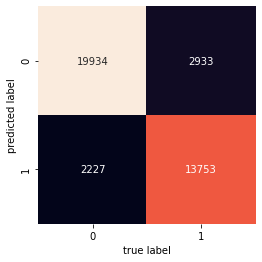

In [24]:
# evaluating the performance with a confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [25]:
#Predict the response for test dataset
y_pred = model_NB.predict(X_test)

In [26]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8671712101320566


 Decision tree

In [27]:
#imports
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [28]:
# Creating the Decision Tree classifer 
model_DT = DecisionTreeClassifier()

In [29]:
# Training the Decision Tree Classifer
model_DT = model_DT.fit(X_train,y_train)

In [30]:
#Predict the response for test dataset
y_pred_DT = model_DT.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT))

Accuracy: 0.9460704816330734


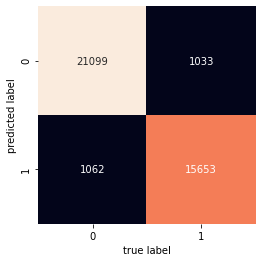

In [31]:
#confusion matrix for a default decision tree
mat_DT = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [32]:
# Attempting to improve the model accuracy even further by pruning

model_DT1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

model_DT1 = model_DT1.fit(X_train,y_train)

y_pred_DT = model_DT1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT))

Accuracy: 0.8856797178675316


In [33]:
# using entropy criterion and max depth 3 decreased the model accuracy to 88.5%

model_DT2 = DecisionTreeClassifier(max_depth=3)

model_DT2 = model_DT2.fit(X_train,y_train)

y_pred_DT = model_DT2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT))

Accuracy: 0.8857826859216928


In [34]:
# gini with this same max depth yields a slightly higher accuracy

model_DT3 = DecisionTreeClassifier(max_depth=5)

model_DT3 = model_DT3.fit(X_train,y_train)

y_pred_DT = model_DT3.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT))

Accuracy: 0.9065822328622545


In [35]:
# increasing the max_depth increased the accuracy of the model, although
# increasing this parameter could lead to overfitting

model_DT4 = DecisionTreeClassifier(max_depth=10)

model_DT4 = model_DT4.fit(X_train,y_train)

y_pred_DT = model_DT4.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT))

Accuracy: 0.9463793857955569


In [36]:
# increasing the max_depth of the classifier to 10 increased the accuracy
# of the model by 0.3% up to 94%. The initial model still did well

model_DT5 = DecisionTreeClassifier(criterion="entropy", max_depth=10)

model_DT5 = model_DT5.fit(X_train,y_train)

y_pred_DT = model_DT5.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT))

Accuracy: 0.9473833243236286


In [37]:
# running it with entropy criterion did not change the accuracy much

model_DT6 = DecisionTreeClassifier(max_depth=20)

model_DT6 = model_DT6.fit(X_train,y_train)

y_pred_DT = model_DT6.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT))

# increasing max depth to 20 increased the model accuracy by 0.3%

Accuracy: 0.9518881766931809


Logistic regression

In [38]:
# importing libraries
import statsmodels.api as sm

In [39]:
# building the model and fitting the data
model_LR = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.413455
         Iterations 7


In [40]:
model_LR.params
model_LR.pred_table()
model_LR.summary()
model_LR.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                 Pseudo R-squared:      0.396     
Dependent Variable:        satisfaction          AIC:                   74993.1001
Date:                      2022-05-28 18:15      BIC:                   75190.8078
No. Observations:          90640                 Log-Likelihood:        -37476.   
Df Model:                  20                    LL-Null:               -62097.   
Df Residuals:              90619                 LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            7.0000                                                 
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
Gender                            -0.3908   0.0181 -21.6206 0.0000 -0.4263 -0.3554
Customer Type                     -0.7806   0.0167 -46.7070 0.0000 -0.8134 -0.7479
Age                                0.1368   0.0097  14.1078 0.0000  0.1178  0.1558
Type of Travel                     0.3472   0.0209  16.5940 0.0000  0.3062  0.3882
Class                              0.3958   0.0125  31.6284 0.0000  0.3713  0.4203
Flight Distance                    0.4562   0.0105  43.4767 0.0000  0.4356  0.4767
Inflight wifi service              0.5152   0.0150  34.3192 0.0000  0.4858  0.5446
Departure/Arrival time convenient -0.2300   0.0117 -19.7238 0.0000 -0.2529 -0.2072
Ease of Online booking            -0.3199   0.0158 -20.2663 0.0000 -0.3508 -0.2889
Gate location                      0.0836   0.0109   7.6490 0.0000  0.0622  0.1050
Food and drink                    -0.1097   0.0136  -8.0604 0.0000 -0.1364 -0.0831
Online boarding                    0.9741   0.0130  75.0707 0.0000  0.9486  0.9995
Seat comfort                       0.1189   0.0138   8.6358 0.0000  0.0919  0.1458
Inflight entertainment             0.4056   0.0174  23.3587 0.0000  0.3715  0.4396
On-board service                   0.2912   0.0120  24.3164 0.0000  0.2677  0.3147
Leg room service                   0.4098   0.0103  39.8236 0.0000  0.3896  0.4300
Baggage handling                   0.0427   0.0121   3.5154 0.0004  0.0189  0.0665
Checkin service                    0.2799   0.0100  27.9608 0.0000  0.2603  0.2995
Inflight service                   0.0136   0.0128   1.0682 0.2854 -0.0114  0.0386
Cleanliness                        0.1064   0.0150   7.0767 0.0000  0.0770  0.1359
Departure Delay in Minutes        -0.1370   0.0094 -14.5327 0.0000 -0.1555 -0.1186
==================================================================================

"""

In [41]:
# performing predictions on the test datdaset
y_pred_LR = model_LR.predict(X_test)

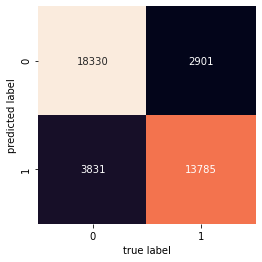

In [42]:
# confusion matrix for LR

prediction = list(map(round, y_pred_LR))
cm = confusion_matrix(y_test, prediction)

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [47]:
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Test accuracy =  0.8267047648467063


In [43]:
# Grid searching key hyperparametres for logistic regression
# Trying models with different solvers and c values to find the most accurate LR model

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [49]:
# defining the models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [50]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [51]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.873161 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.873088 (0.003272) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873088 (0.003272) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.873088 (0.003272) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.873095 (0.003279) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873099 (0.003277) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.873121 (0.003291) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.873128 (0.003296) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873128 (0.003296) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.873161 (0.003281) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.873088 (0.003224) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873088 (0.003232) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.873099 (0.003076) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.872834 (0.003246) wit

In [ ]:
# the highest accuracy achieved with logistic regression is 87.3%

# Conclusion

The highest accuracy of 95% and the best overall results were achieved by the decision tree algorithm. Given the high interpretability of the decision tree algorithm this solution seems to be the best for this particular problem. It could be further developed to formulate a set of logical rules that lead to a satisfied customer and then target those particular parameters to increase the satisfaction rate among customers.